In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import vapeplot
plt.rcParams['svg.fonttype'] = 'none'
%matplotlib inline

from datetime import datetime
def timestamp(): return datetime.today().strftime('%Y%m%d')

from sklearn.preprocessing import QuantileTransformer
def quantile_scale(df,feats):
    qua = df
    scaler = QuantileTransformer(
        n_quantiles=10,
        random_state=42,
        ignore_implicit_zeros=True, #sparse matrix
    )
    # fit the scaler
    scaler.fit(qua[feats])
    # transform values
    qua[feats] = scaler.transform(qua[feats])
    return qua
def tiered(classes):
    trans = []
    for x in classes:
        if x==1: c=0
        if x==2: c=1
        if x>=3 and x<=4: c=2
        if x>=5 and x<=7: c=3
        if x>=8: c=4
        trans.append(c)
    return trans

In [35]:
df = pd.read_csv("../RESULTS/gbbo.features.20190909.tsv",sep="\t")
feats = ['tech_mean','tech','mean_star','star','mean_good','good','mean_bad','bad']
df = quantile_scale(df,feats)
df['place']=tiered(df['place'])
df = df.loc[df['season']!=1]
df.head()

,season,baker,episode,place,tech_mean,tech,mean_star,star,mean_good,good,mean_bad,bad
60,2,Ben,1,3,0.111111,5.555556e-01,1.000000e-07,1.000000e-07,1.000000e-07,1.000000e-07,1.000000e-07,1.000000e-07
61,2,Ben,2,3,0.083333,4.444444e-01,1.000000e-07,1.000000e-07,1.000000e-07,1.000000e-07,1.000000e-07,1.000000e-07
62,2,Ben,3,3,0.111111,6.111111e-01,1.000000e-07,1.000000e-07,1.000000e-07,1.000000e-07,1.000000e-07,1.000000e-07
63,2,Ben,4,3,0.217645,7.777778e-01,1.000000e-07,1.000000e-07,1.000000e-07,1.000000e-07,1.000000e-07,1.000000e-07
64,2,Ben,5,3,0.139520,1.000000e-07,1.000000e-07,1.000000e-07,1.000000e-07,1.000000e-07,1.000000e-07,1.000000e-07


In [36]:
cols = list(reversed(['#00247d', '#787095', '#c6c6a9', '#d57e67', '#cf142b']))
colr = {}
for i,e in enumerate(cols): colr[i]=e
df['colr'] = df['place'].map(colr)

In [37]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

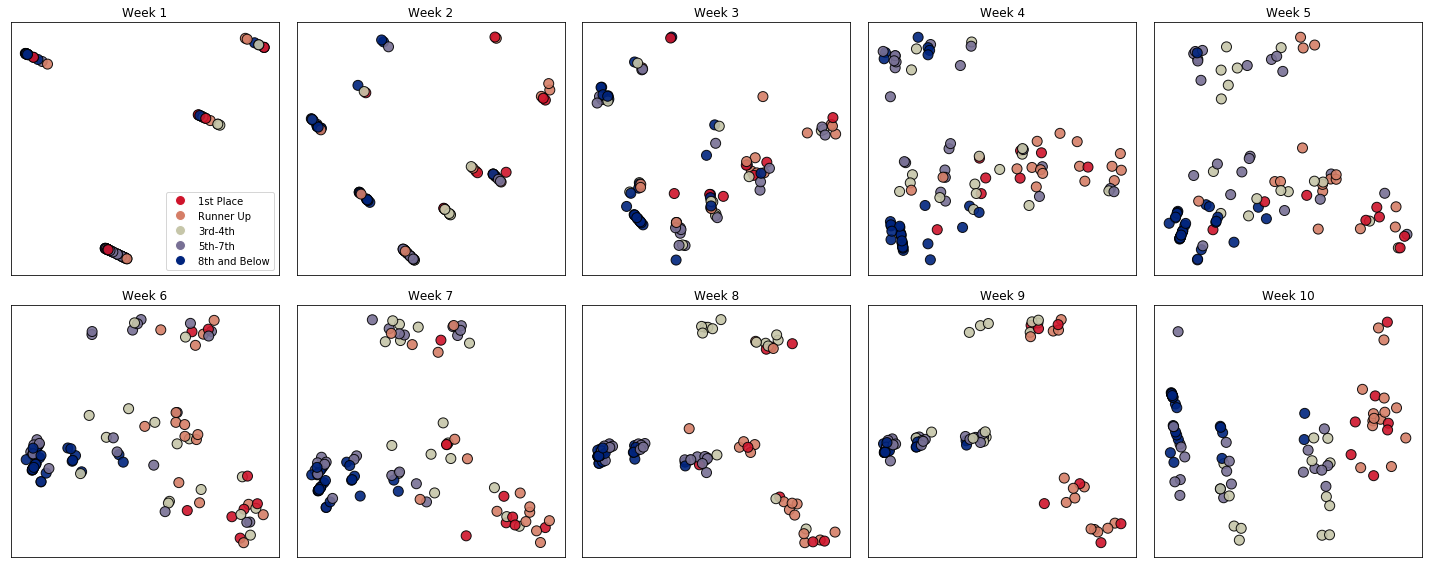

In [66]:
import warnings
warnings.filterwarnings("ignore")
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

def plot_pca(ax,mat,PC1,PC2,colr):
    ax.scatter(
        mat[:,PC1-1],
        mat[:,PC2-1],
        edgecolor='k',
        c=colr,
        s=100,
        alpha=0.9
    )
    
nrows=2
ncols=5
sz=4

f, axes = plt.subplots(nrows,ncols,figsize=(sz*ncols,sz*nrows))
for e,ax in zip(set(df['episode']),axes.flatten()):
    tmp = df.loc[df['episode']==e]
    N_COM=2
    pca = PCA(n_components=N_COM)
    pca = pca.fit_transform(tmp[feats])
    plot_pca(ax,pca,1,2,tmp['colr'])
    ax.set_title('Week {}'.format(e))
    ax.set_xticks([])
    ax.set_yticks([])

ms=10
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='1st Place',markerfacecolor=cols[0], markersize=ms),
    Line2D([0], [0], marker='o', color='w', label='Runner Up',markerfacecolor=cols[1], markersize=ms),
    Line2D([0], [0], marker='o', color='w', label='3rd-4th',markerfacecolor=cols[2], markersize=ms),
    Line2D([0], [0], marker='o', color='w', label='5th-7th',markerfacecolor=cols[3], markersize=ms),
    Line2D([0], [0], marker='o', color='w', label='8th and Below',markerfacecolor=cols[4], markersize=ms),
]
axes[0,0].legend(handles=legend_elements, loc='best')
f.tight_layout()
f.savefig("../FIGURES/week.pca.png",dpi=150)
f.show()

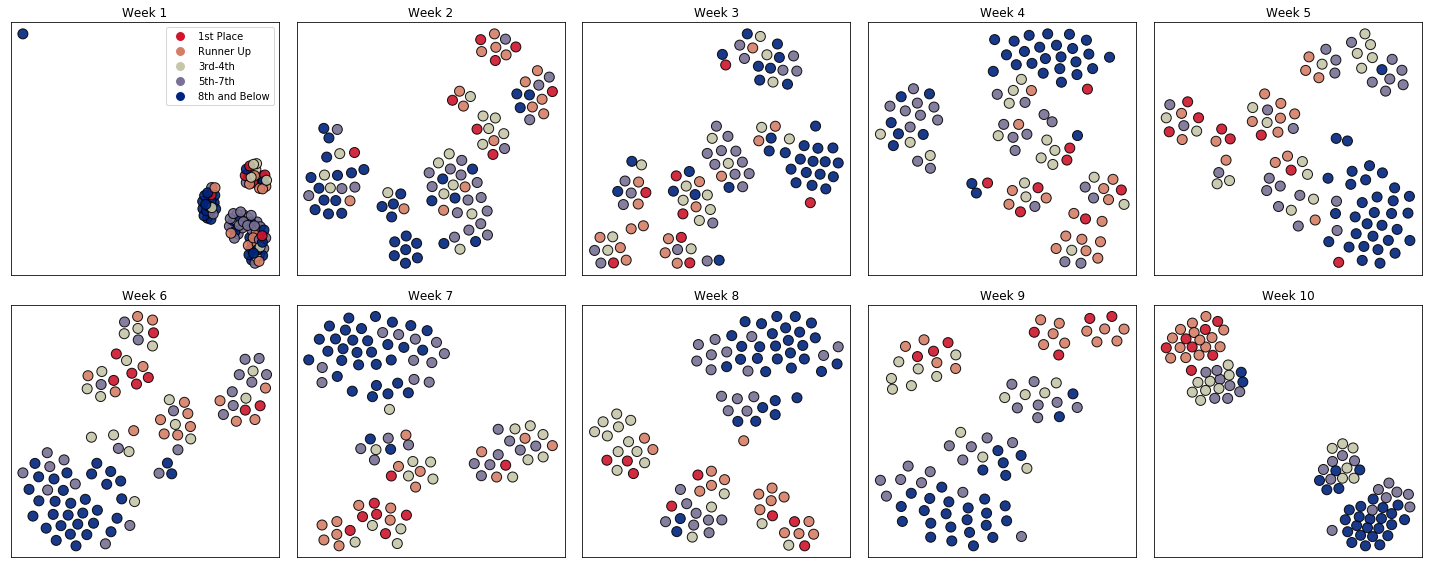

In [130]:
#TSNE
f, axes = plt.subplots(nrows,ncols,figsize=(sz*ncols,sz*nrows))
for e,ax in zip(set(df['episode']),axes.flatten()):
    tmp = df.loc[df['episode']==e]
    N_COM=2
    
    tsne = TSNE(
        n_components=N_COM,
        verbose=0,
        perplexity=30,
        learning_rate=800,
        n_iter=2000,
        random_state=42,
    )
    
    tsne = tsne.fit_transform(tmp[feats])
    plot_pca(ax,tsne,1,2,tmp['colr'])
    ax.set_title('Week {}'.format(e))
    ax.set_xticks([])
    ax.set_yticks([])

axes[0,0].legend(handles=legend_elements, loc='best')
f.tight_layout()
f.savefig("../FIGURES/week.tsne.png",dpi=150)
f.show()


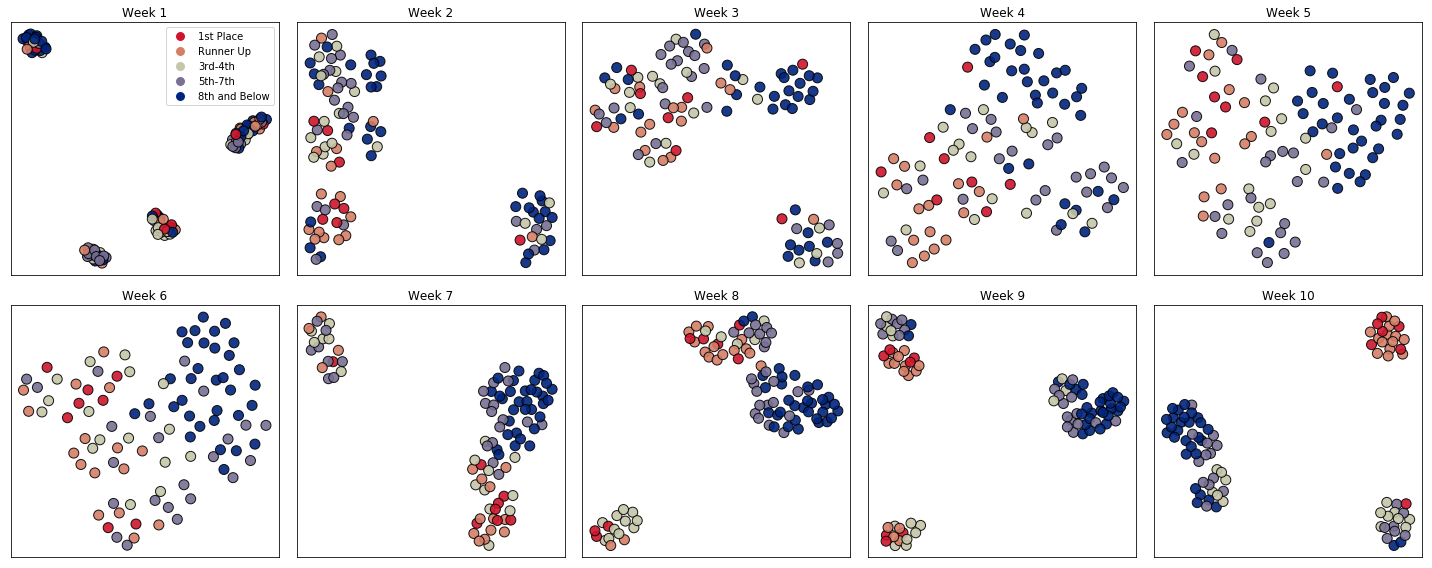

In [131]:
#UMAP
import umap

f, axes = plt.subplots(nrows,ncols,figsize=(sz*ncols,sz*nrows))
for e,ax in zip(set(df['episode']),axes.flatten()):
    tmp = df.loc[df['episode']==e]
    
    ump = umap.UMAP(
        n_neighbors=45,
        random_state=42,
        learning_rate=0.1,
        min_dist=0.99,
    )
    ump = ump.fit_transform(tmp[feats])
    plot_pca(ax,ump,1,2,tmp['colr'])
    ax.set_title('Week {}'.format(e))
    ax.set_xticks([])
    ax.set_yticks([])

axes[0,0].legend(handles=legend_elements, loc='best')
f.tight_layout()
f.savefig("../FIGURES/week.umap.png",dpi=150)
f.show()


In [62]:
a = ump

In [63]:
a[:,0]

array([ 41.87103  , -12.795865 , -12.674821 , -10.484012 ,  -8.517196 ,
       -13.311464 , -13.400824 ,  42.242733 , -25.601841 , -25.722145 ,
        -9.458228 ,  -8.145663 , -12.102536 , -13.232719 ,  -9.7396145,
        42.17259  , -12.774538 ,  -8.978775 , -22.933878 ,  42.893494 ,
       -10.525472 ,  41.049103 , -25.453537 , -13.218772 , -23.770079 ,
       -26.31771  ,  41.89605  , -11.579744 , -13.537185 ,  42.67989  ,
       -13.184907 , -12.4991665,  41.915047 ,  -7.7437615, -12.616181 ,
       -22.832325 , -22.581339 ,  42.118576 , -26.429354 ,  -7.722973 ,
       -11.381111 , -26.292955 , -23.30874  ,  -8.705093 ,  -9.78203  ,
       -14.64985  , -13.129428 , -13.167611 , -13.088274 ,  41.29939  ,
       -26.27744  , -12.765286 , -10.590634 , -13.005261 ,  -9.369988 ,
       -13.9192705, -12.244822 , -11.3803625, -23.865002 , -14.041814 ,
       -13.65501  , -13.034307 , -26.43025  , -12.964337 ,  43.079075 ,
       -23.796026 , -11.317963 ,  42.576893 , -10.246404 , -14.4